# Computer Vision con TensorFlow en el set de datos de MNIST

Podemos usar las APIs de Keras de alto nivel de Tensorflow para resolver problemas clásicos de Machine Learning y Computer Vision.

En este notebook, seguiremos los pasos realizados para predecir el número de 1 dígito presente en las fotos que nos proporciona el [dataset de MNIST](https://en.wikipedia.org/wiki/MNIST_database).

<a href="https://colab.research.google.com/github/gincos/data-science-portfolio/blob/master/tensorflow_tutorials/mnist_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero que nada, se importan las librerías necesarias para solucionar este problema

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Paso 1 - Importar la data

Importar las fotos y las etiquetas de tf.keras.datasets MNIST.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Paso 1.a - Visualizar ejemplo

Tomamos una imagen para entender visualmente su matriz de datos.

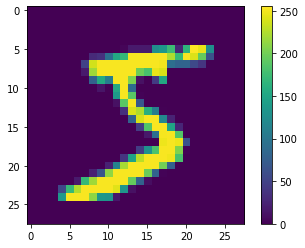

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
plt.figure(figsize=(10, 10))

### Paso 1.b - Pre-procesar data

Las imágenes son matrices de 28x28 con valores del 0 al 255 que describen el color (el 0 es blanco y el 255 negro). Se pueden limitar al rango de 0 a 1 para mejorar el rendimiento del entrenamiento.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Referencias:

[Why Data Normalization for Machine Learning?](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)

### Paso 1.c - Visualizar la pareja imagen-etiqueta

Ahora mostramos en una cuadrícula cómo cada imagen está etiquetada en el dataset.

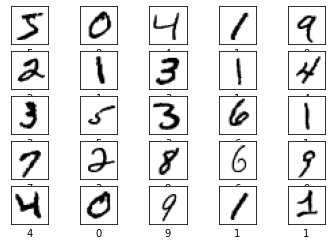

In [5]:
# Mostramos 25 imagenes
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Paso 2 - Definir la Red Neuronal

Usamos las APIs de alto nivel de Keras para definir una Red Neuronal con una capa de pre-procesamiento ("flatten" o aplanamiento), 2 capas profundas y una capa de salida.

*   Es "Secuencial" ya que cada capa corre una después de la otra
*   En la capa de pre-procesamiento, vamos desarmando las entradas de la matriz (28, 28) a un vector de 784 entradas, para cada imagen con que alimentamos al modelo. Esto hace al proceso más rápido y efectivo.
*   Tenemos 2 capas profundas. "Dense" significa que todos sus nodos están conectados a todos los de la capa anterior y siguiente.
*   La capa de salida tiene 10 nodos ya que cada uno corresponde a una posible clasificación (los números del 0 al 9).
*   La salida del modelo es un vector de 10 entradas, cada una correspondiendo a la probabilidad de que la imagen entregada pertenezca a una determinada clasificación. Por tanto, la predicción del clasificador vendrá dada por la probabildad más alta en este vector.

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, ))  # Capa de salida

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Referencias:

[ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

[Softmax](https://en.wikipedia.org/wiki/Softmax_function)

## Paso 3 - Compilar el modelo

Configuramos al modelo para ser entrenado. Aquí especificamnos nuestro optimizador y función de pérdida, al igual que cualquier métrica que queramos evaluar en el modelo.

In [0]:
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Referencias:

[RMSProp](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a)

[Sparse Categorical Cross-entropy](https://www.reddit.com/r/MLQuestions/comments/93ovkw/what_is_sparse_categorical_crossentropy/)

## Paso 4 - Entrenar el modelo

Ahora entrenamos el modelo usando train_images y train_labels. Esto le dará valor a todos los pesos e interceptos de las capas que definimos.

Si ya ha sido entrenado, podemos guardar los valores de un modelo para luego configurar otro recién compilado rápidamente de la misma forma, de modo que no es necesario entrenar al modelo cada vez.

In [8]:
# Opcion 1 - Entrenar
model.fit(train_images, train_labels, epochs=5)

# -------------------  OR  ---------------------

# Opcion 2 - Guardar y Restaurar

# Restaurar los valores (optional)
# model.load_weights('./checkpoints/saved_weights')

# Step 4.3 - Restaurar los valores (opcional)
model.save_weights('./checkpoints/saved_weights')

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 225us/sample - loss: 0.1893 - acc: 0.9437
Epoch 2/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0924 - acc: 0.9741
Epoch 3/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0748 - acc: 0.9806
Epoch 4/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0650 - acc: 0.9843
Epoch 5/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0608 - acc: 0.9865


## Paso 5 - Evaluar

Podemos analizar el rendimiento general del modelo que acabamos de entrenar.

In [9]:
loss, acc = model.evaluate(test_images, test_labels)
print('Pérdida: ' + str(loss))
print('Precisión: ' + str(acc))

10000/10000 [==============================] - 1s 65us/sample - loss: 0.1238 - acc: 0.9781
Pérdida: 0.1237836969238584
Precisión: 0.9781


### Paso 5.1 - Mostrar la etiqueta predecida para una imagen aleatoria

Finalmente, podemos probar nuestro modelo entrenado en una imagen aleatoria del set de prueba para visualizar los resultados de su predicción.

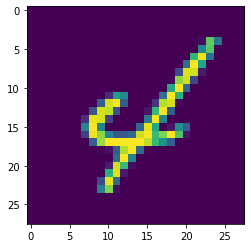


Predicción: 4


<Figure size 720x720 with 0 Axes>

In [13]:
import random

# Obtener indice aleatorio para el vector de imagenes de prueba
random_index = random.randint(0, len(test_images) - 1)

# Predecir etiqueta para dicho ejemplar
test_prediction = model.predict(test_images[random_index:random_index + 1])

# Visualizar la prediccion al lado de su imagen generadora
plt.figure()
plt.imshow(test_images[random_index])
plt.grid(False)
plt.show()
plt.figure(figsize=(10, 10))
print('\nPredicción: '+str(np.argmax(test_prediction)))